# Continuing Intro to Machine Learning with TritonHack 2024!

### Are there other ways to test our model, and what other models can we use?
To find out, Let's once again read in our data and set up our model!

In [17]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('./train_extended.csv')
data_no_sex =  data.drop(['Sex'],axis=1)
y = data_no_sex['Age']
X = data_no_sex.drop(['Age'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression().fit(X_train, y_train)

In [21]:
prediction = np.array([round(i) for i in model.predict(X_train)])
prediction

array([ 8, 11, 11, ..., 10, 16, 14])

## Overfitting?

What other tests can we run on our model? One thing we can do is test for overfitting. This is when a model 'adjusts' to predict training data, but is unable to predict new data. To test if our model is overfitting, we can look at error values: if the training data has a low error rate but the test data has a high error rate, this indicates overfitting.

## Mean Squared Error, Mean Absolute Error
There are different ways to calculate error. Remember that we already calculated RMSE (root mean squared error). RMSE is just the square root of Mean Squared Error, which is the average of the squared differences between our predicted and actual values. There is also MAE, or Mean Absolute Error. MAE is essentially the same, except we take the absolute value of the differences without squaring. Here's a quick breakdown of their pros and cons:
### MSE:
It is harder to interpret, since it is in units that are the square of the data. Like RMSE, it penalizes large errors more, making it more sensitive to outliers.
### RMSE:
It is easy to interpret since it shares the same units as the data, so it is more widely used. Like MSE, it penalizes large errors more, making it more sensitive to outliers.
### MAE:
It is easy to understand and interpret!\
Use MAE if you want to consider outliers less- It is not as sensitive to outliers, since it considers all errors with equal weight. 

To recap, here is the RMSE function we wrote earlier:

In [22]:
def RMSE(y,pred):
    return np.sqrt(np.mean((y-pred)**2))

Let's create functions for MSE and MAE ourselves! MSE will be like the RMSE function we wrote, except without the square root. And for our MAE function, we need to replace the square with an absolute value.

In [23]:
def MSE(y,pred):
    return np.mean((y-pred)**2)
def MAE(y,pred):
    return np.mean(abs(y-pred))

Now, let's calculate the MSE and MAE for our model on training data.

In [24]:
prediction = np.array([round(i) for i in model.predict(X_train)])
MSE(y_train,prediction)

4.357074626865671

In [25]:
MAE(y_train,prediction)

1.4275820895522389

Next, let's calculate the MSE and MAE for our model on testing data.

In [26]:
prediction = np.array([round(i) for i in model.predict(X_test)])
MSE(y_test,prediction)

4.426227272727273

In [27]:
MAE(y_test,prediction)

1.4319242424242424

We found that the error slightly increased on testing data. This is fairly normal, but could indicate possible overfitting. To do further testing, we can try something called K-fold cross validation.
## Cross-validation
Before we created our model, we had to divide our data into a training set and a testing set. If we want to test our model more, we can use cross-validation.
Cross-validation shuffles the data and splits the data into "k" groups, or folds. If k = 10, it is called 10-Fold Cross Validation. First, a single fold is chosen to be the testing group: the model is trained on the other folds, then tested on our group. This is repeated "k" times for all the folds!
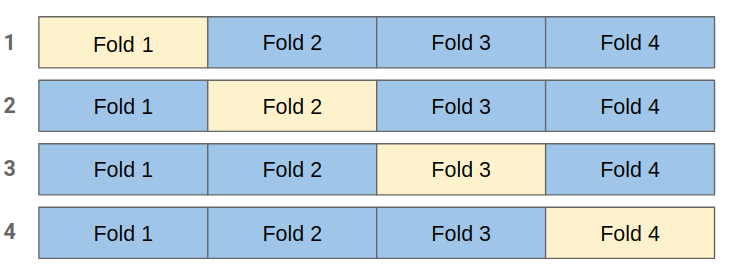

In [28]:
from sklearn.model_selection import KFold,cross_val_score

In [29]:
kfold = KFold(n_splits = 10)
score_ten = cross_val_score(model,X,y, cv=kfold)

In [30]:
print("10-Fold Cross Validation Scores are: {}".format(score_ten))

10-Fold Cross Validation Scores are: [0.57528346 0.58808351 0.59216977 0.5760871  0.58894322 0.58805388
 0.58310906 0.59276052 0.585349   0.57718794]


We successfully got the scores for all 10 times it ran! Let's look at the average score:

In [31]:
print("Average 10-Fold Cross Validation score: {}".format(score_ten.mean()))

Average 10-Fold Cross Validation score: 0.5847027457860713


This is similar to the score we calculated in the Introduction, and so we know our evaluation of our model performance is fairly accurate. 

### Cross validation and RMSE
We also want to perform k-fold cross validation using RMSE too, so we know what our average error is. Let's do this by changing the 'scoring' parameter in cross_val_score, and setting it equal to 'neg_root_mean_squared_error'. Let's also make sure to take the absolute value!

In [32]:
rmse_score = abs(cross_val_score(model,X,y, scoring = 'neg_root_mean_squared_error', cv=kfold))
print("RMSE Average 10-Fold Cross Validation Error: {}".format(rmse_score.mean()))

RMSE Average 10-Fold Cross Validation Error: 2.073045970721343


Great, we can now assess our model with both cross validation and RMSE!
### Why is it important to test with both?
Well, cross validation ensures that we are testing the model on new data each time- we switch up what is the "testing" and "training data" so that we can test our model for overfitting. And using an error measure like RMSE evaluates how big our errors are compared to the average. We don't have to use RMSE though- we can use MAE if we want to consider the outliers less.

So far, we've been using our linear regression model. Let's try using some other machine learning algorithms and run cross validation on them.

## K-Nearest Neighbors Regression
K-nearest neighbors is another common algorithm we can try. If you imagine all the data points on a graph, it classifies a new point by looking at the "k" number of nearest points. Basically, it groups together nearby points. 
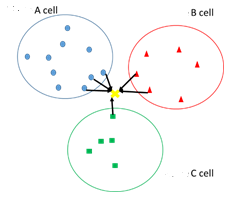

### Features:
-It can be used for classification or regression- in this case, we are doing regression!\
(Our model is looking for numerical ages, whereas classification would be grouping into separate categories.)\
-It is very sensitive to outliers.\
-You don't have to "train" the model, so it is flexible to data changes.\
-It is simple to implement and understand!\

### Cons:
-It can be a slow and inefficient if there is a lot of data.\
-It can be hard to find the optimal number of neighbors.\
-Data needs to be balanced over the testing variable for the best results.

Let's import the pre-built model and test it!

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn_model = KNeighborsClassifier()
rmse_score = abs(cross_val_score(knn_model,X,y, scoring = 'neg_root_mean_squared_error', cv=kfold))
print("RMSE Average 10-Fold Cross Validation Error: {}".format(rmse_score.mean()))

RMSE Average 10-Fold Cross Validation Error: 3.8613175400847624


### Changing Number of Neighbors
The default number of neighbors is 5 neighbors, so we can try seeing what happens if we increase the number of neighbors it considers. Let's see if the score increases for 10 or 20 neighbors:

In [35]:
for i in range(10, 21, 10):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    kfold = KFold(n_splits = i)
    knn_score = abs(cross_val_score(knn_model,X,y, scoring = 'neg_root_mean_squared_error', cv=kfold))
    print("RMSE Average Cross Validation Error for {} neighbors is {}".format(i, knn_score.mean()))

RMSE Average Cross Validation Error for 10 neighbors is 3.8367027768987745
RMSE Average Cross Validation Error for 20 neighbors is 3.664896006914759


The error slightly decreased for 10 and 20 neighbors! There are other parameters you can tweak to try to improve the accuracy as well.

## Decision Tree
Decision tree is another popular algorithm we can test. It creates a tree map that splits into more and more nodes as it takes into account the different variables. Here is a a tree visualization, with each decision splitting each 'branch' into two nodes:
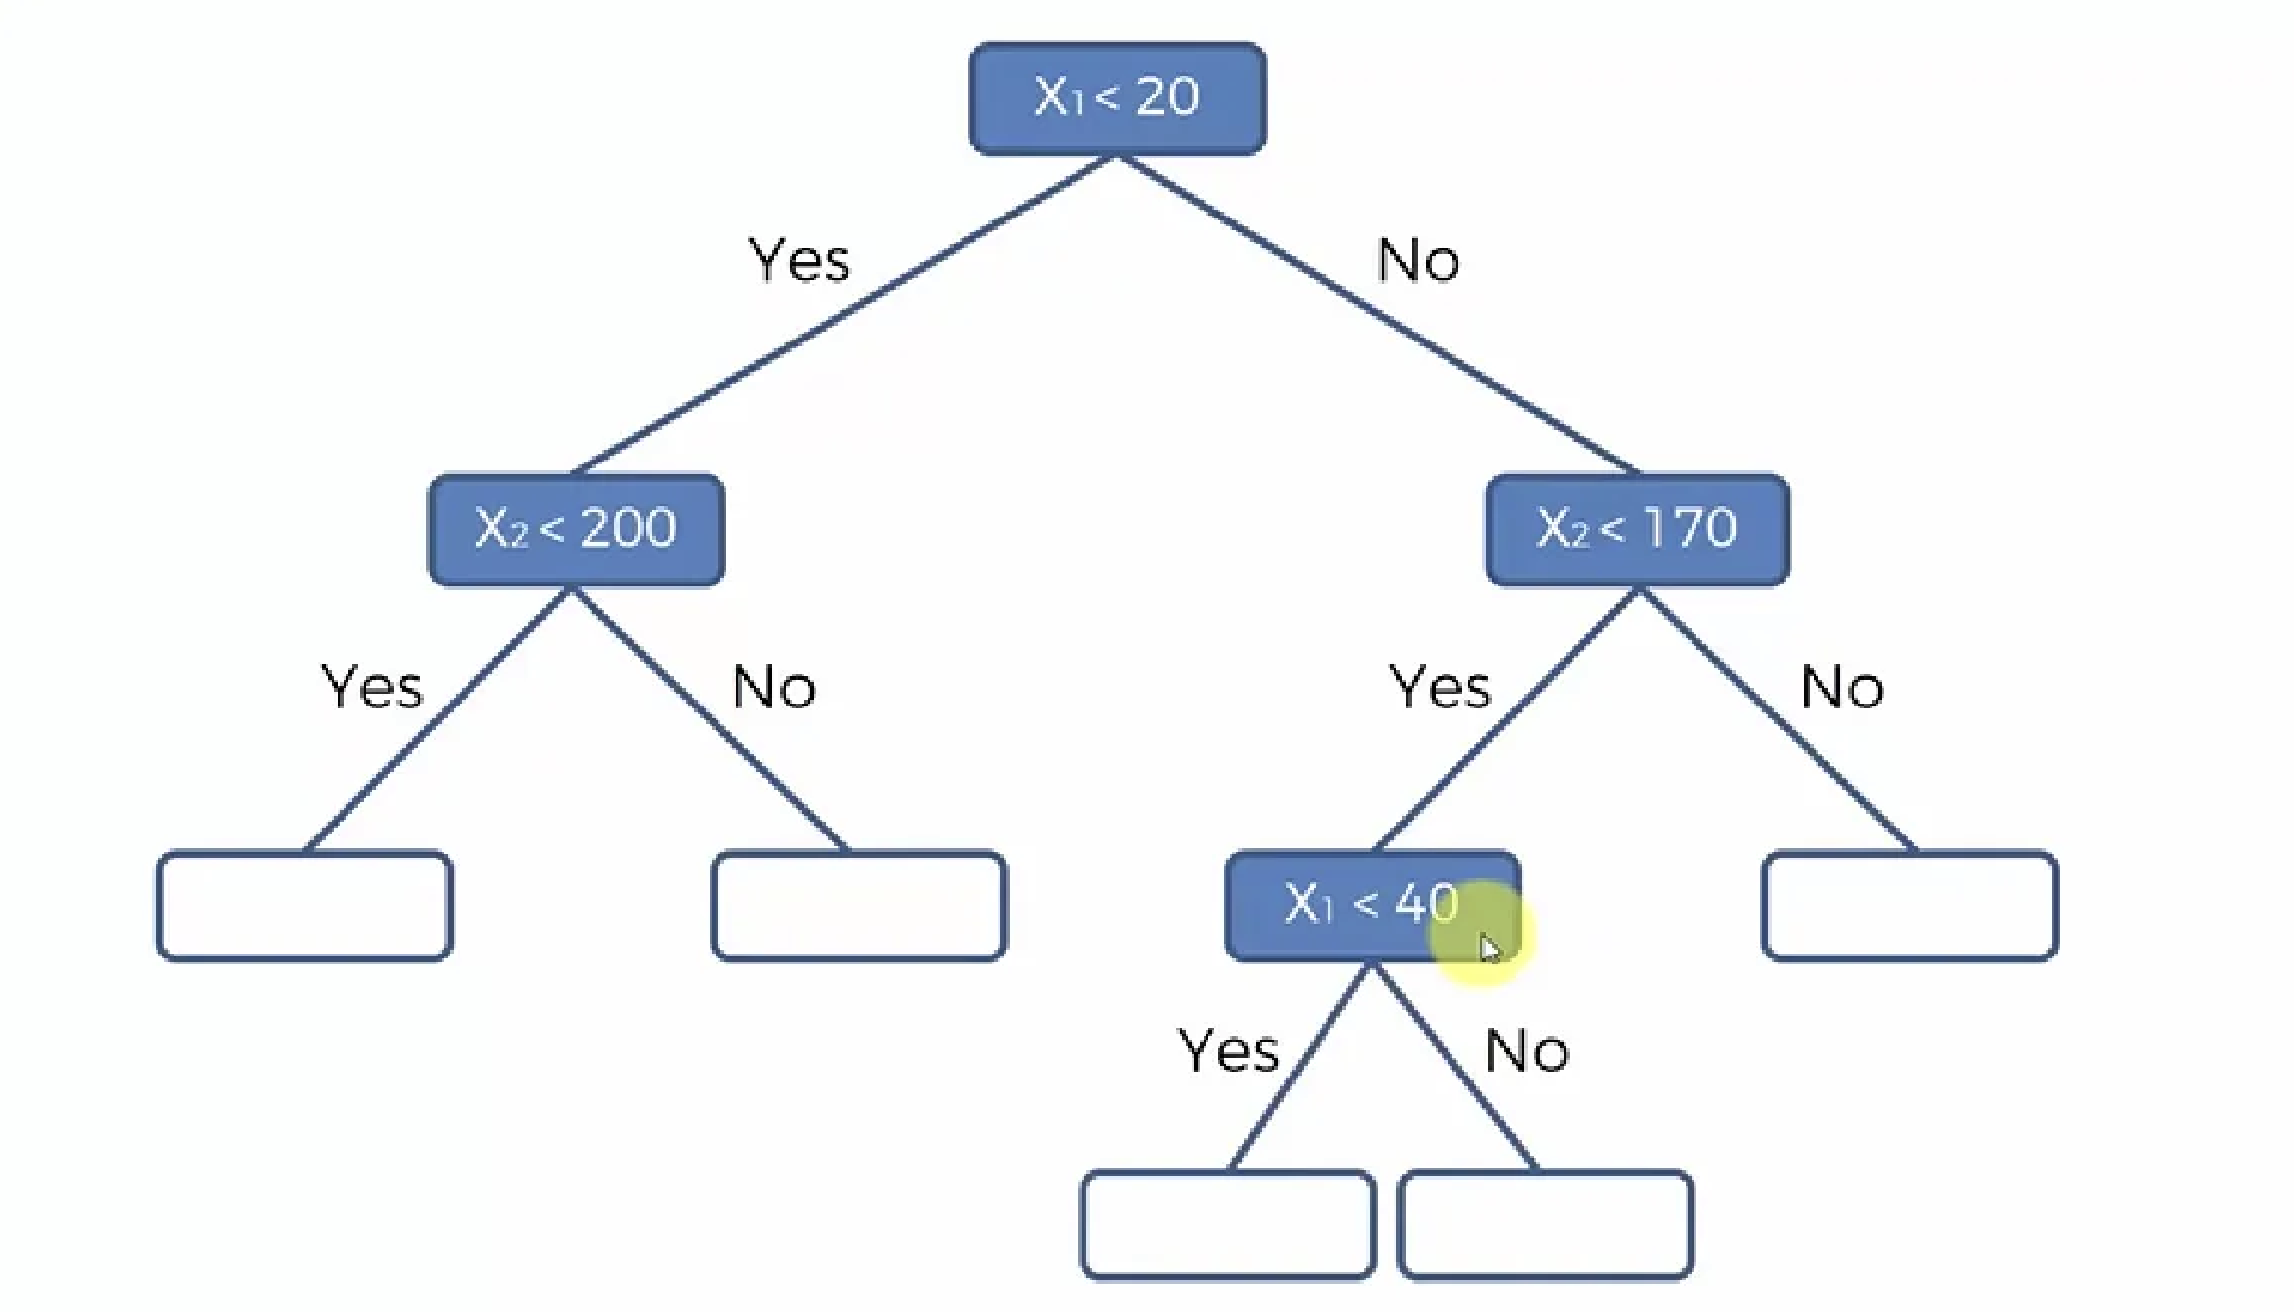

Behind the scenes, each 'decision' that splits a node is like drawing a line segment dividing the data into two groups. In the graph below, each line segment corresponds to a split. 
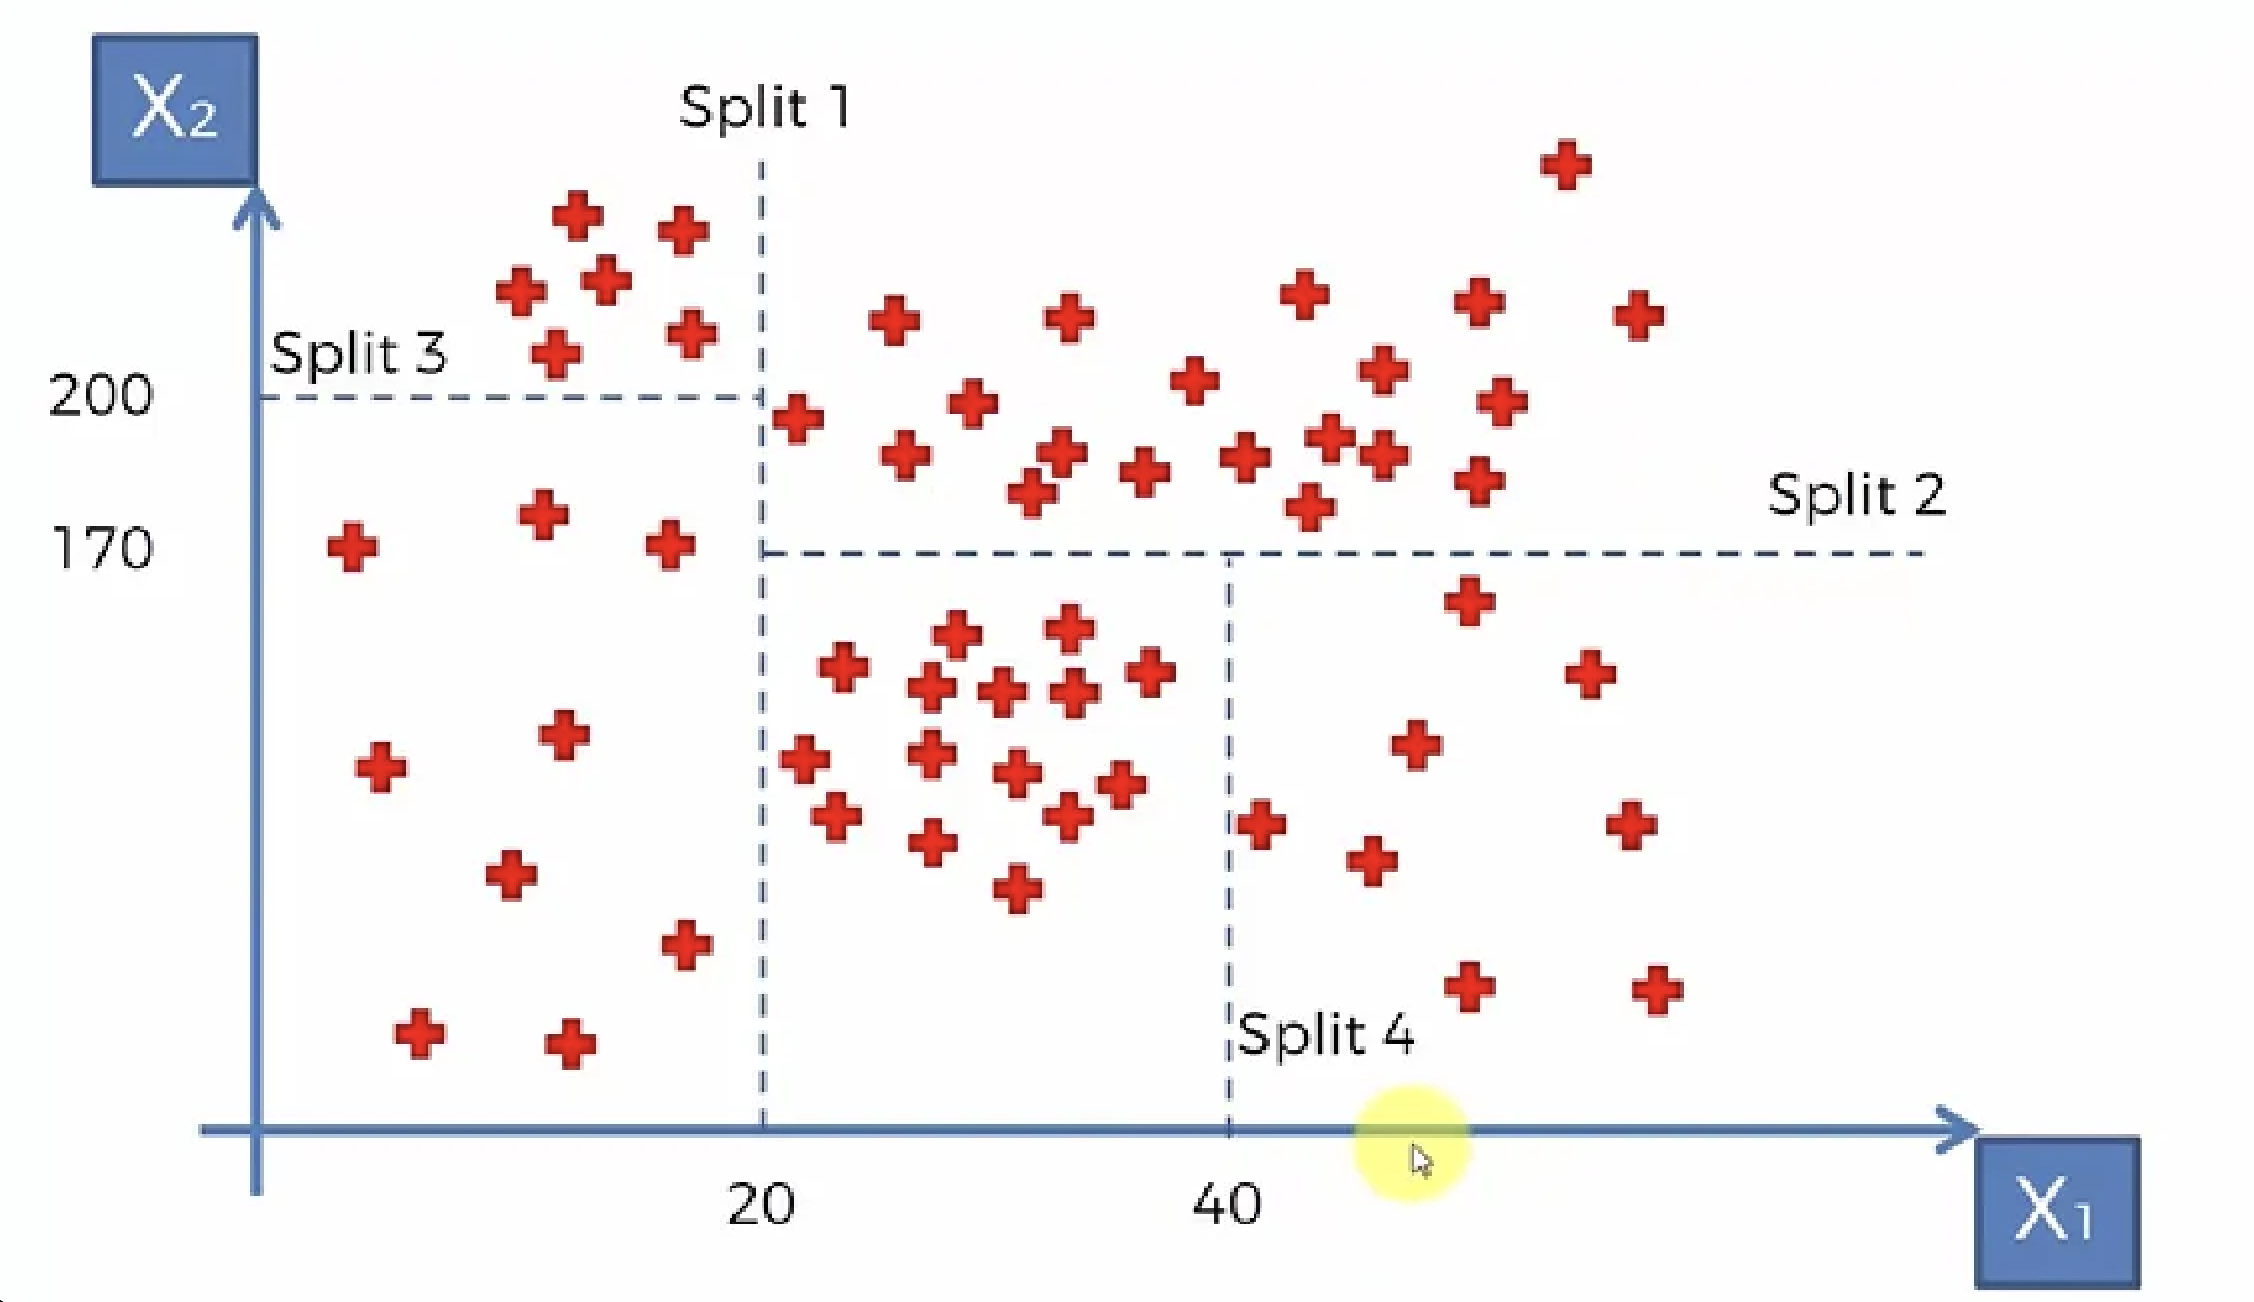
After drawing all these line segments, you get a lot of different regions of points! The model calculates the average of the points in each region, and takes all the averages to make a prediction.

### Features compared to K-Nearest Neighbors:
-Missing/imbalanced data does not affect this model as much as K-NN.\
-More time, complexity needed to train the model\
-It is less flexible to data changes: one change can completely change the tree structure

Now that you have an idea of what the model is about, let's create the model and test it.

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

In [38]:
kfold = KFold(n_splits = 10)
tree_score = abs(cross_val_score(tree_model,X,y, scoring = 'neg_root_mean_squared_error', cv=kfold))
print("RMSE Average 10-Fold Cross Validation Error: {}".format(tree_score.mean()))

RMSE Average 10-Fold Cross Validation Error: 2.7959560623237345


### Tuning Parameters
If you're interested, you can try tuning parameters such as max_depth and min_samples_split to improve the model score (check out the scikit-learn documentation). max_depth sets the maximum depth of the tree, or how many times it should keep splitting the nodes before stopping. A deeper tree is more affected by the data set, so reduce max_depth to reduce overfitting, and increase it to reduce underfitting.\
You can also check out RandomForestClassifier, an algorithm that uses multiple decision trees and compares all of their results.